some stuff

In [19]:

import os
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/workspaces/CP1-24-final/zbpetersbuf/code')
import final as fin

In [20]:
import importlib
import final
importlib.reload(final) 

<module 'final' from '/workspaces/CP1-24-final/zbpetersbuf/code/final.py'>

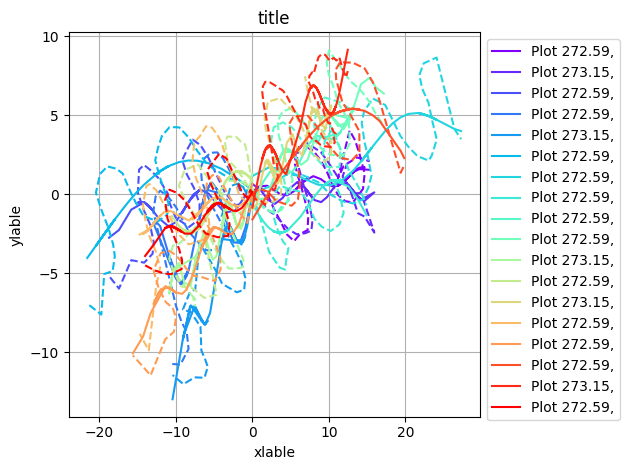

In [21]:
import matplotlib.cm as cm

files = fin.filenamelister('sinewalk', '.csv')

plt.figure()
cmap = cm.rainbow
norm = plt.Normalize(vmin=0, vmax=19)

for i in range(20):
    if i not in [10, 16]:
        file = files[i]
        temp = fin.fah_to_kel(fin.find_fah(fin.filenamelister(fin.findmdfromcsv(file))[0]))
        yreal, y, x, adj, _= fin.funfit(file)
        color = cmap(norm(i))
        plt.plot(x, y, color=color, label=f'Plot {temp},')
        plt.plot(x, yreal, color=color, linestyle='--')



plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('title')
plt.xlabel('xlable')
plt.ylabel('ylable')
plt.tight_layout()
plt.grid()

adr value 0.03579144664860734 is too low for FFT. It needs to be greater than 0.2.
adr value -0.06831253810825322 is too low for FFT. It needs to be greater than 0.2.
adr value 0.0463001077343419 is too low for FFT. It needs to be greater than 0.2.
adr value 0.16764699397750793 is too low for FFT. It needs to be greater than 0.2.
adr value 0.03503815322394688 is too low for FFT. It needs to be greater than 0.2.
adr value 0.019381629930073085 is too low for FFT. It needs to be greater than 0.2.
adr value 0.12878425595809828 is too low for FFT. It needs to be greater than 0.2.


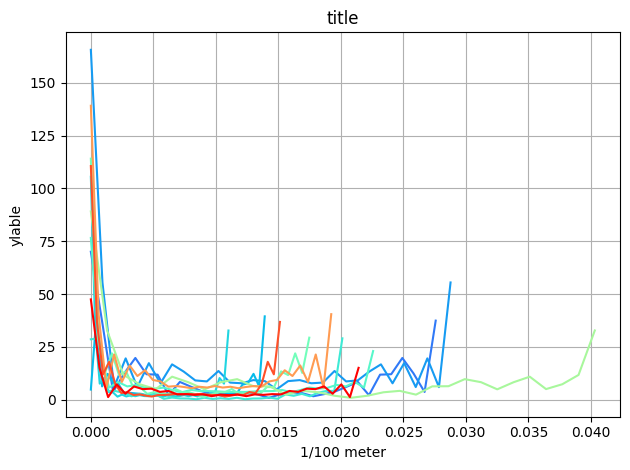

In [22]:
plt.figure()

for i in range(20):
    if i not in [10, 16]:

        file = files[i]
        _, ynew, x, adj, tim = fin.funfit(file)
        fft = fin.fftfinding(ynew, adj, tim, 0.2)
        xax = fin.freqfinder(x)
        if fft is not None:
            color = cmap(norm(i))
                
            plt.plot(xax, np.abs(fft), color=color)

plt.title('title')
plt.xlabel('1/100 meter')
plt.ylabel('ylable')
plt.tight_layout()
plt.grid()


adr value 0.03579144664860734 is too low for FFT. It needs to be greater than 0.2.
adr value -0.06831253810825322 is too low for FFT. It needs to be greater than 0.2.
adr value 0.0463001077343419 is too low for FFT. It needs to be greater than 0.2.
adr value 0.16764699397750793 is too low for FFT. It needs to be greater than 0.2.
adr value 0.03503815322394688 is too low for FFT. It needs to be greater than 0.2.
adr value 0.019381629930073085 is too low for FFT. It needs to be greater than 0.2.
adr value 0.12878425595809828 is too low for FFT. It needs to be greater than 0.2.


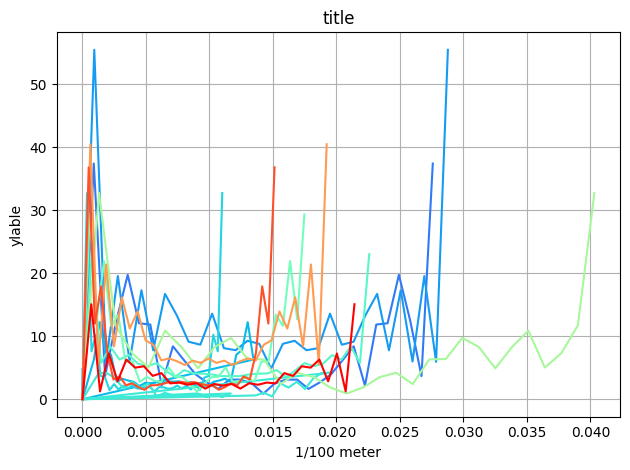

In [23]:
plt.figure()

for i in range(20):
    if i not in [10, 16]:
        file = files[i]
        _, ynew, x, adj, tim = fin.funfit(file)
        fft = fin.fftfinding(ynew, adj, tim, 0.2)
        freq = fin.freqfinder(x)
        if fft is not None:
            color = cmap(norm(i))

            filfft = fin.filteredfreq(np.abs(fft),freq,0.7,0.01)
            plt.plot(filfft[1], filfft[0], color=color)

plt.title('title')
plt.xlabel('1/100 meter')
plt.ylabel('ylable')
plt.tight_layout()
plt.grid()

adr value 0.03579144664860734 is too low for FFT. It needs to be greater than 0.2.
adr value -0.06831253810825322 is too low for FFT. It needs to be greater than 0.2.
adr value 0.0463001077343419 is too low for FFT. It needs to be greater than 0.2.
adr value 0.16764699397750793 is too low for FFT. It needs to be greater than 0.2.
adr value 0.03503815322394688 is too low for FFT. It needs to be greater than 0.2.
adr value 0.019381629930073085 is too low for FFT. It needs to be greater than 0.2.


adr value 0.12878425595809828 is too low for FFT. It needs to be greater than 0.2.


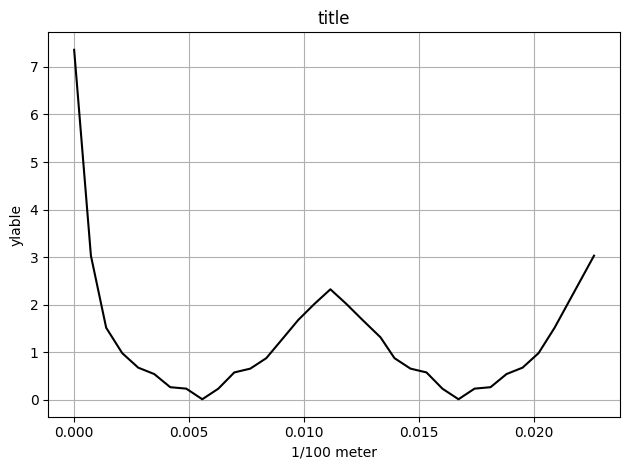

In [24]:
plt.figure()

compfft = [] 
compfreq = []
for i in range(20):
    if i not in [10, 16]:
        file = files[i]
        _, ynew, x, adj, tim = fin.funfit(file)
        fft = fin.fftfinding(ynew, adj, tim, 0.2)
        freq = fin.freqfinder(x)

        if fft is not None:
                
            newfft, newfreq = fin.filteredfreq(np.abs(fft),freq,0.7,0.01)
            compfft.append(newfft)
            compfreq.append(newfreq)

asdf = np.array(compfreq)
asdf2 = np.array(compfft)

xax = fin.sumfunk(asdf)
newfft2 = fin.sumfunk(asdf2)

plt.plot(xax, fin.inv_fft(newfft2,True), color='black')

plt.title('title')
plt.xlabel('1/100 meter')
plt.ylabel('ylable')
plt.tight_layout()
plt.grid()